In [29]:
import os
import numpy as np
import pandas as pd
import ast
from scipy.stats import iqr,yeojohnson, skew, kurtosis
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import regex as re
import eda_helper_functions
import matplotlib.gridspec as gridspec
import scipy.stats as stats

In [15]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [16]:
df = pd.read_csv("2nd_after_univariate_analysis_dataset.csv")

In [17]:
df.head(1)

id  \
0  cardid69429251   

                                                                                                                                        url  \
0  https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531   

                                                                                                                                                   image  \
0  https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg   

                                                                        name  \
0  2 bhk flat  for sale in  tenx habitat raymond realty, pokhran road, thane   

                                                                                                      wholeaddress  \
0  {'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}   

                            address   flooring  \
0  pokhran road, thane, maharashtra  vitrified   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [18]:
df.shape

(11894, 46)

`observation`
- dataset consists of  rows and  columns

In [19]:
#Columns in our dataset
df.columns

Index(['id', 'url', 'image', 'name', 'wholeaddress', 'address', 'flooring',
       'image_urls', 'available_units', 'towers', 'locality_rank',
       'locality_rating', 'construction', 'overlooking', 'ownership',
       'extra_rooms', 'bath', 'parking', 'builder', 'project_name', 'furnish',
       'price', 'area', 'costpersqft', 'property_type', 'status', 'lift',
       'flat_on_floor', 'total_floor', 'balcony', 'facing', 'bed', 'lattitude',
       'longitude', 'seller', 'addressregion', 'price_category', 'education',
       'transport', 'shopping_centre', 'commercial_hub', 'hospital', 'tourist',
       'emi', 'project_in_acres', 'location_from_wholeaddress'],
      dtype='object')

In [20]:
df.shape

(11894, 46)

In [21]:
df.columns

Index(['id', 'url', 'image', 'name', 'wholeaddress', 'address', 'flooring',
       'image_urls', 'available_units', 'towers', 'locality_rank',
       'locality_rating', 'construction', 'overlooking', 'ownership',
       'extra_rooms', 'bath', 'parking', 'builder', 'project_name', 'furnish',
       'price', 'area', 'costpersqft', 'property_type', 'status', 'lift',
       'flat_on_floor', 'total_floor', 'balcony', 'facing', 'bed', 'lattitude',
       'longitude', 'seller', 'addressregion', 'price_category', 'education',
       'transport', 'shopping_centre', 'commercial_hub', 'hospital', 'tourist',
       'emi', 'project_in_acres', 'location_from_wholeaddress'],
      dtype='object')

In [22]:
#Description of our dataset
df.describe().T

#T refers to transpose that displays the description of our dataset in long format.

,count,mean,std,min,25%,50%,75%,max
available_units,6676.0,465.475584,1085.788012,6.000000,120.000000,282.000000,550.000000,4.000000e+04
towers,6868.0,4.624199,6.940877,1.000000,1.000000,3.000000,5.000000,2.000000e+02
locality_rank,8063.0,122.406424,126.565803,1.000000,16.000000,92.000000,186.000000,8.390000e+02
locality_rating,11430.0,3.759361,1.067680,0.000000,3.900000,4.000000,4.200000,5.000000e+00
bath,11864.0,2.315324,0.963525,1.000000,2.000000,2.000000,3.000000,1.000000e+01
parking,5662.0,1.392088,0.722071,1.000000,1.000000,1.000000,2.000000,1.200000e+01
price,11894.0,2.908627,4.238493,0.017000,0.950000,1.780000,3.200000,8.000000e+01
area,11889.0,879.286231,697.556563,3.000000,540.000000,730.000000,1035.000000,4.085200e+04
costpersqft,11888.0,28269.241813,51408.883998,147.000000,16909.250000,25581.000000,34286.000000,5.333333e+06
lift,6455.0,3.116809,1.714334,1.000000,2.000000,3.000000,4.000000,1.000000e+01


In [23]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          11894 non-null  object 
 1   url                         11894 non-null  object 
 2   image                       11006 non-null  object 
 3   name                        11894 non-null  object 
 4   wholeaddress                11894 non-null  object 
 5   address                     11894 non-null  object 
 6   flooring                    11894 non-null  object 
 7   image_urls                  7645 non-null   object 
 8   available_units             6676 non-null   float64
 9   towers                      6868 non-null   float64
 10  locality_rank               8063 non-null   float64
 11  locality_rating             11430 non-null  float64
 12  construction                10838 non-null  object 
 13  overlooking                 793

`observation`
- Our dataset features consists of three datatypes
  - float
  - integer
  - object
- Of which total numerical features are 18
- And categorical features are 28.

# User-Defined Functions

In [32]:
def num_three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout=True, figsize=(20, 12))
    grid = gridspec.GridSpec(ncols=4, nrows=6, figure=fig)
    
    ax1 = fig.add_subplot(grid[0:2, :3])  # Boxen Plot
    ax1.set_title('Boxen Plot')
    sns.boxenplot(x=df[feature], y=df['price'], ax=ax1)
    
    ax2 = fig.add_subplot(grid[2:4, :3])  # Box Plot
    ax2.set_title('Box Plot')
    sns.boxplot(x=df[feature], y=df['price'], ax=ax2)
    
    ax3 = fig.add_subplot(grid[4:6, :3])  # Count Plot
    ax3.set_title('Count Plot')
    sns.countplot(x=df[feature], ax=ax3)
    
    plt.show()

`observation`  
will do analysis of each column with price and address column also 
- Multivariate analysis on Numerical columns
- Multivariate analysis on Categorical columns

# Multivariate analysis on Numerical columns

In [24]:
#find the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)
print("-"*100)
print(f'total numerical columns : {len(numerical_columns)}')

Index(['available_units', 'towers', 'locality_rank', 'locality_rating', 'bath',
       'parking', 'price', 'area', 'costpersqft', 'lift', 'flat_on_floor',
       'total_floor', 'balcony', 'bed', 'lattitude', 'longitude', 'emi',
       'project_in_acres'],
      dtype='object')
----------------------------------------------------------------------------------------------------
total numerical columns : 18


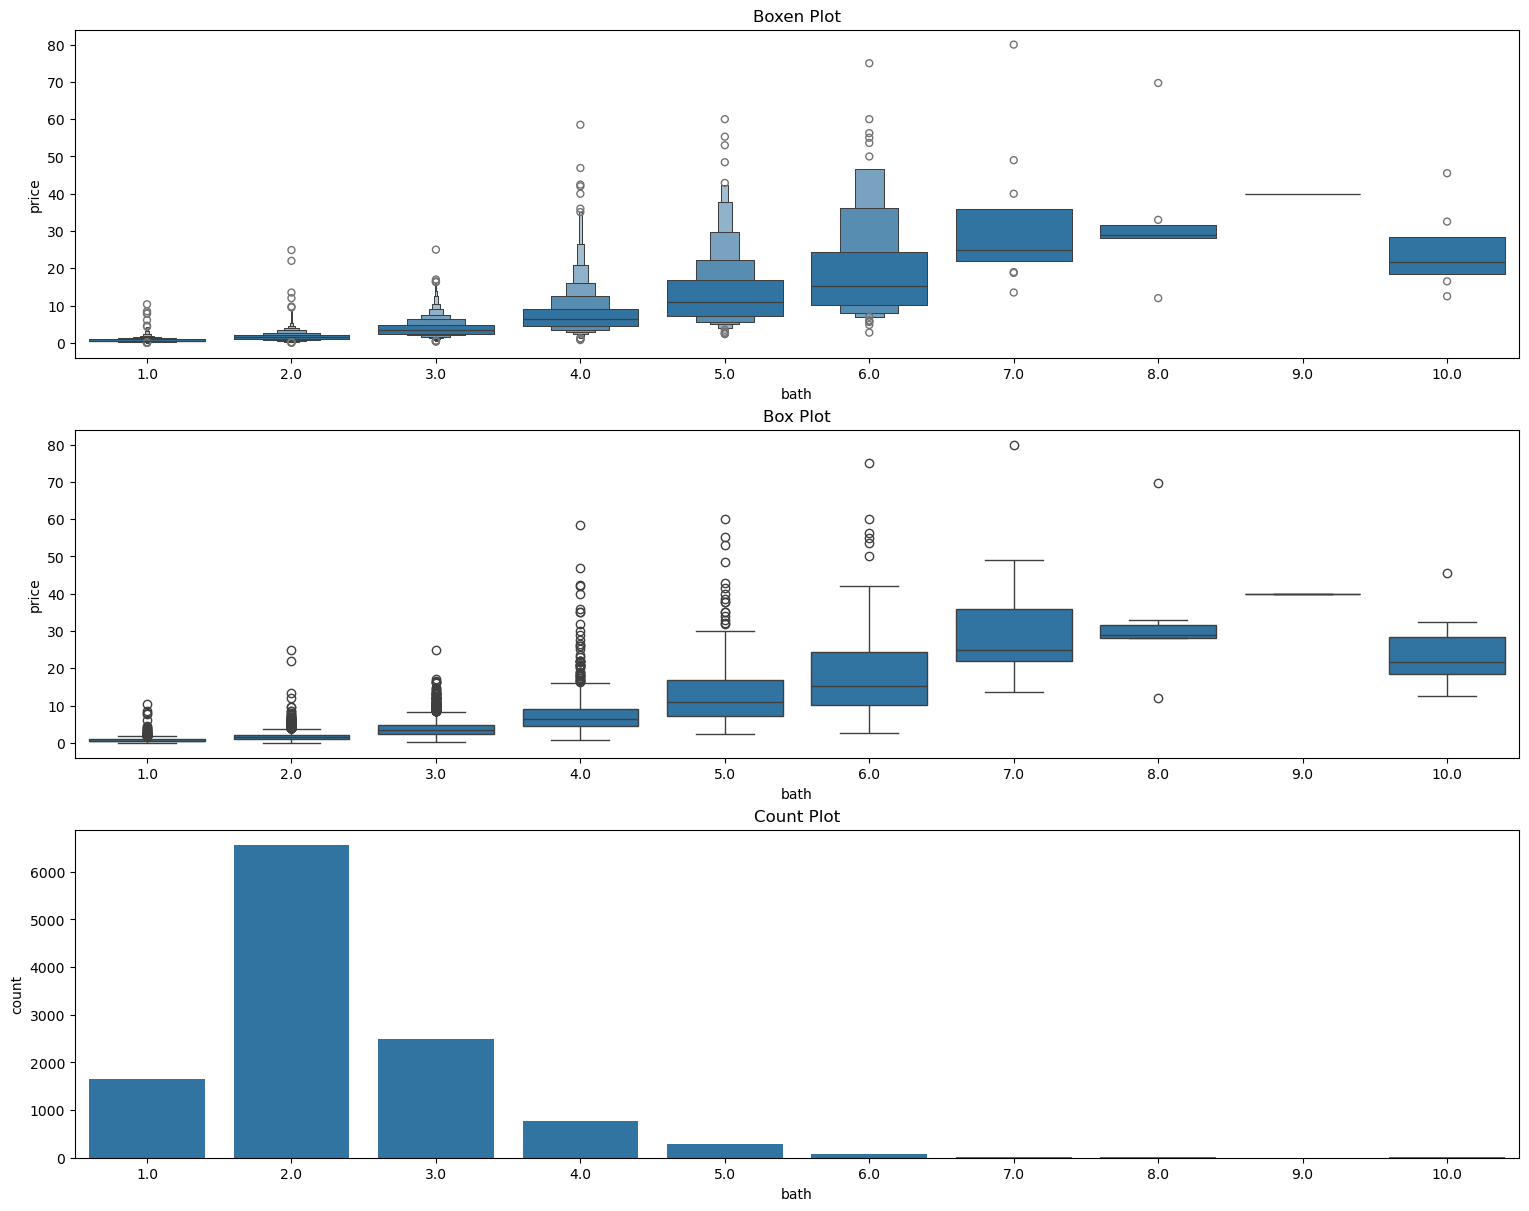

In [33]:
num_three_chart_plot(df, 'bath')

In [35]:
def num_two_chart_plot(df, feature):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    axes[0].set_title('Distribution Plot')
    sns.histplot(df[feature], kde=True, ax=axes[0])
    
    axes[1].set_title('Scatter Plot')
    sns.scatterplot(x=df[feature], y=df['price'], ax=axes[1])
    
    plt.show()

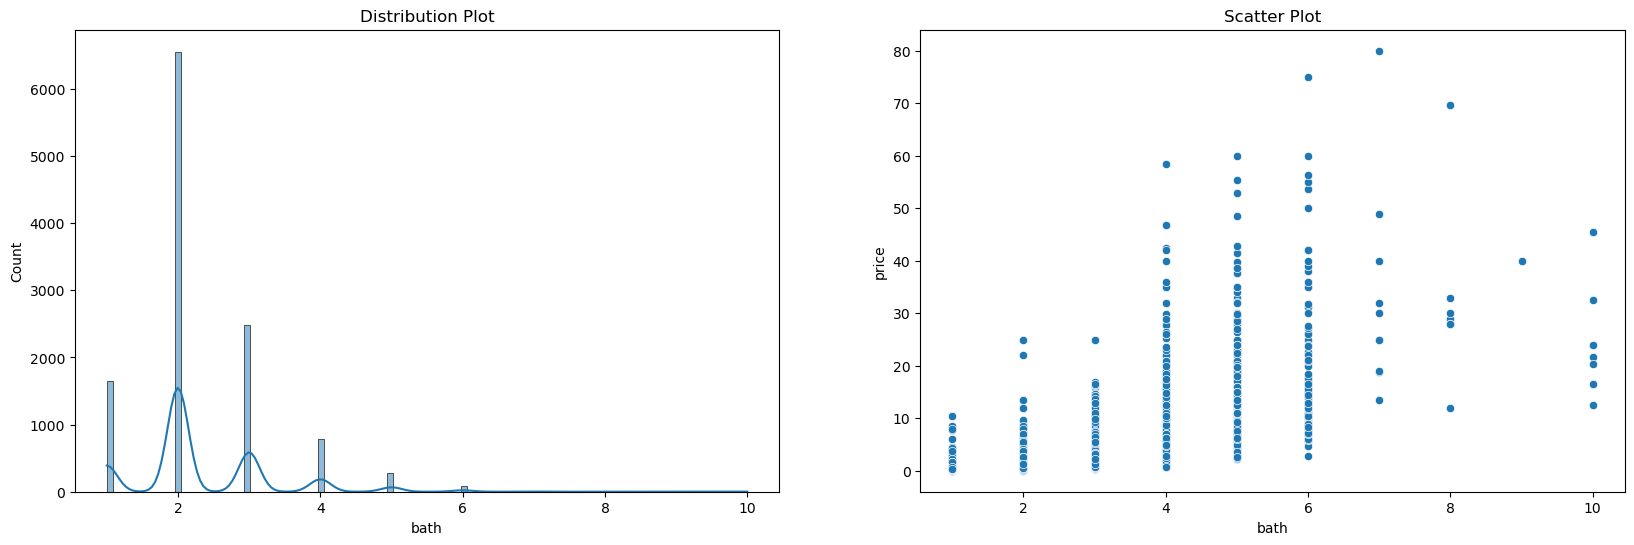

In [36]:
num_two_chart_plot(df, 'bath')